In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/Users/poorvadityabehre/Desktop/College/DL_FINAL/mnist_784_csv.csv")
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
df.shape

(70000, 785)

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(y)

[5 0 4 ... 4 5 6]


In [9]:
# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)

# normalise data 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [10]:
# make autoencoder architecture 
encoding_dim = 32 # Size of the encoded representations
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [11]:
# get autoencoder model 
autoencoder = Model(input_img, decoded)

In [12]:
# compile 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
219/219 [==============================] - 1s 3ms/step - loss: 0.2895 - val_loss: 0.2046
Epoch 2/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1833 - val_loss: 0.1681
Epoch 3/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1569 - val_loss: 0.1488
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1417 - val_loss: 0.1367
Epoch 5/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1316 - val_loss: 0.1283
Epoch 6/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1245 - val_loss: 0.1223
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.1194 - val_loss: 0.1179
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.1155 - val_loss: 0.1144
Epoch 9/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1124 - val_loss: 0.1118
Epoch 10/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1102 - val_loss: 0.1097

In [14]:
# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)

438/438 [==============================] - 0s 314us/step


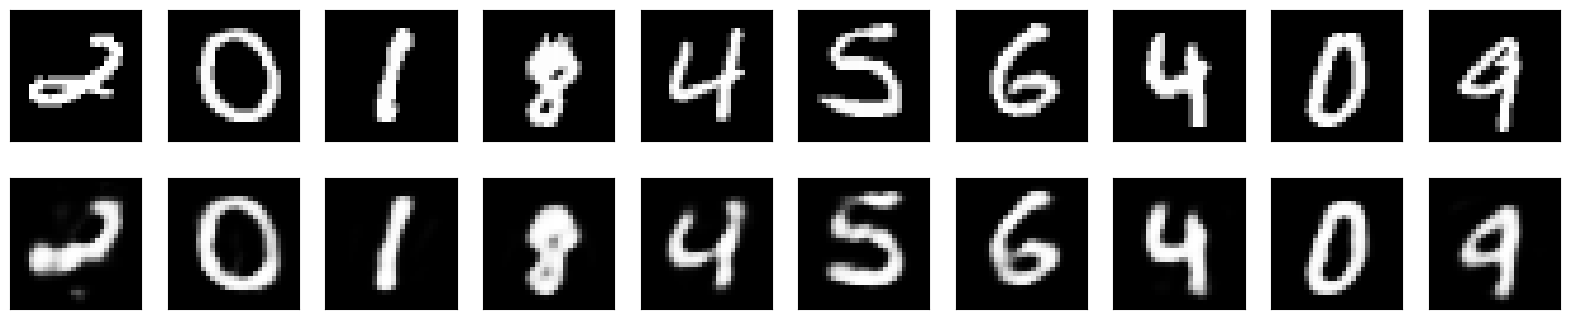

In [15]:
# Plot the original and reconstructed images
n = 10 # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()